In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import datetime

import matplotlib.style as style
%matplotlib inline
style.use('seaborn-whitegrid')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [2]:
weather = pd.read_csv('../04_weekly_weather.csv')
# Convert our report_date columns to datetime datatype
weather['date'] = pd.to_datetime(weather['date'], format="%Y-%m-%d")

# create new year and month column from datetime
weather['year'] = pd.DatetimeIndex(weather['date']).year
weather['month'] = pd.DatetimeIndex(weather['date']).month

In [3]:
weather

,date,max_temp,max_temp1,max_temp2,location,mean_temp,mean_temp1,mean_temp2,min_temp,min_temp1,min_temp2,dew_point,dew_point1,dew_point2,precipitation,precipitation1,precipitation2,wind,wind1,wind2,year,month
0,2015-11-28,94.0,94.0,94.0,Mexico-Guerrero,84.0,84.0,84.0,73.0,75.0,74.0,75.0,78.0,77.0,1.22,0.00,0.00,4.0,4.0,4.0,2015,11
1,2015-12-05,93.0,94.0,94.0,Mexico-Guerrero,82.0,84.0,84.0,72.0,73.0,75.0,74.0,75.0,78.0,0.00,1.22,0.00,4.0,4.0,4.0,2015,12
2,2015-12-09,92.0,93.0,35.0,Mexico-Guerrero,82.0,82.0,29.0,72.0,72.0,23.0,74.0,74.0,24.0,0.00,0.00,30.99,4.0,4.0,6.0,2015,12
3,2015-12-12,92.0,93.0,94.0,Mexico-Guerrero,82.0,82.0,84.0,72.0,72.0,73.0,74.0,74.0,75.0,0.00,0.00,1.22,4.0,4.0,4.0,2015,12
4,2015-12-16,32.0,92.0,93.0,Mexico-Guerrero,28.0,82.0,82.0,23.0,72.0,72.0,23.0,74.0,74.0,6.35,0.00,0.00,7.0,4.0,4.0,2015,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112639,2016-06-28,27.0,25.0,28.0,Mexico-Zacatecas,20.0,18.0,21.0,13.0,12.0,14.0,9.0,9.0,10.0,0.00,0.00,0.00,10.0,14.0,13.0,2016,6
112640,2016-06-29,80.0,77.0,82.0,Mexico-Mexico,67.0,64.0,69.0,55.0,53.0,56.0,48.0,48.0,49.0,0.00,0.00,0.00,6.0,9.0,8.0,2016,6
112641,2016-06-29,80.0,77.0,82.0,Mexico-Zacatecas,67.0,64.0,69.0,55.0,53.0,56.0,48.0,48.0,49.0,0.00,0.00,0.00,6.0,9.0,8.0,2016,6
112642,2016-07-02,80.0,77.0,28.0,Mexico-Mexico,67.0,64.0,21.0,55.0,53.0,14.0,48.0,48.0,10.0,0.00,0.00,0.00,6.0,9.0,13.0,2016,7


In [4]:
zika = pd.read_csv('../zikavirus_dataset.csv')

# filter out those rows which does not contain any data
zika = zika.dropna(how = 'all')
  
# Filter all rows for which the report_date is equal to 18437
zika.drop(zika[zika['report_date'] == '18437'].index, inplace = True)

# covert string to an float
zika['cases'] = zika['cases'].astype(float)

# Replace nan value with 0,
zika['cases'] = zika['cases'].fillna(0)

# covert float to an int
zika['cases'] = zika['cases'].astype(int)

# Convert our report_date columns to datetime datatype
zika['report_date'] = pd.to_datetime(zika['report_date'], format="%Y-%m-%d")

# create new year and month column from datetime
zika['year'] = pd.DatetimeIndex(zika['report_date']).year
zika['month'] = pd.DatetimeIndex(zika['report_date']).month

# 1 United States

In [5]:
us_zika = zika[zika["location"].str.startswith("United")]
us_zika.head()

,report_date,location,location_type,data_field,cases,year,month
233323,2016-01-27,United_States-Puerto_Rico,territory,zika_confirmed_4weeks,15,2016.0,1.0
233324,2016-01-27,United_States-Puerto_Rico,territory,zika_confirmed_cumulative_2016,9,2016.0,1.0
233325,2016-01-27,United_States-Puerto_Rico,territory,flavi_confirmed_cumulative_2016,0,2016.0,1.0
233326,2016-01-27,United_States-Puerto_Rico,territory,zika_confirmed_cumulative_2015-2016,18,2016.0,1.0
233327,2016-01-27,United_States-Puerto_Rico,territory,zika_confirmed_pregnant_cumulative_2015-2016,0,2016.0,1.0


In [6]:
us_zika.shape

(9127, 7)

### 1.1 Data fields

In [7]:
us_zika.data_field.unique()

array(['zika_confirmed_4weeks', 'zika_confirmed_cumulative_2016',
       'flavi_confirmed_cumulative_2016',
       'zika_confirmed_cumulative_2015-2016',
       'zika_confirmed_pregnant_cumulative_2015-2016',
       'zika_confirmed_pregnant_symptomatic_cumulative_2015-2016',
       'zika_confirmed_pregnant_asymptomatic_cumulative_2015-2016',
       'gbs_reported_cumulative_2015-2016', 'arbovirus_suspected_4weeks',
       'arbovirus_suspected_cumulative_2016',
       'gbs_reported_zika_confirmed', 'gbs_reported_flavi_confirmed',
       'congenital_developmental_defects_reported_cummulative_2015-2016',
       'zika_confirmed_cumulative_2017',
       'flavi_confirmed_cumulative_2017',
       'zika_confirmed_cumulative_2015-2017',
       'zika_confirmed_pregnant_cumulative_2015-2017',
       'zika_confirmed_pregnant_symptomatic_cumulative_2015-2017',
       'zika_confirmed_pregnant_asymptomatic_cumulative_2015-2017',
       'gbs_reported_cumulative_2015-2017',
       'arbovirus_suspected_c

In [8]:
usLocal = us_zika.loc[(us_zika['data_field'] == 'zika_reported_local') & (us_zika['location_type'] == 'state')]
usLocal = usLocal.sort_values(by=['report_date'])
usLocal.head()

,report_date,location,location_type,data_field,cases,year,month
236582,2016-02-24,United_States-Alabama,state,zika_reported_local,0,2016.0,2.0
236635,2016-02-24,United_States-Washington,state,zika_reported_local,0,2016.0,2.0
236633,2016-02-24,United_States-Virginia,state,zika_reported_local,0,2016.0,2.0
236630,2016-02-24,United_States-Texas,state,zika_reported_local,0,2016.0,2.0
236627,2016-02-24,United_States-Tennessee,state,zika_reported_local,0,2016.0,2.0


### 1.2 Country wise cases

In [9]:
# Countries with zero case
total_cases = usLocal.groupby(['location']).cases.agg([sum])
total_cases.sort_values('sum', ascending=False).head()

,sum
location,
United_States-Florida,2121
United_States-New_York,168
United_States-Texas,112
United_States-California,102
United_States-Massachusetts,32


In [10]:
# remove countries with zero case
cases = total_cases[total_cases['sum'] == 0]
cases.index

Index(['United_States-Arkansas', 'United_States-Connecticut',
       'United_States-Delaware', 'United_States-District_of_Columbia',
       'United_States-Idaho', 'United_States-Montana',
       'United_States-New_Hampshire', 'United_States-New_Mexico',
       'United_States-North_Dakota', 'United_States-South_Dakota',
       'United_States-Tennessee'],
      dtype='object', name='location')

### 1.3 Analyse the pattern of spreading virus - in Florida

In [11]:
florida_zika = usLocal[usLocal['location'] == 'United_States-Florida']
florida_zika = florida_zika.sort_values(by=['report_date'])
florida_zika.head()

,report_date,location,location_type,data_field,cases,year,month
236594,2016-02-24,United_States-Florida,state,zika_reported_local,0,2016.0,2.0
236651,2016-03-02,United_States-Florida,state,zika_reported_local,0,2016.0,3.0
237619,2016-03-09,United_States-Florida,state,zika_reported_local,0,2016.0,3.0
238716,2016-03-16,United_States-Florida,state,zika_reported_local,0,2016.0,3.0
239853,2016-03-23,United_States-Florida,state,zika_reported_local,0,2016.0,3.0


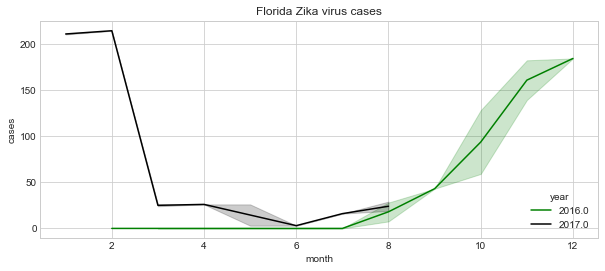

In [32]:
plt.figure(figsize=(10,4))
sns.lineplot(x='month', y='cases', hue='year',data=florida_zika,palette=['green','black'])
plt.title('Florida Zika virus cases')
plt.show()

### 1.4 Analyse the pattern of spreading virus in UNITED STATE

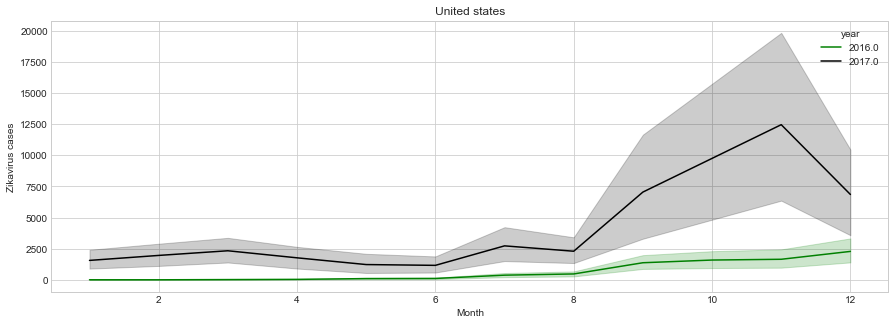

In [13]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='cases', hue='year',data=us_zika,palette=['green','black'])
plt.title('United states')
plt.xlabel('Month')
plt.ylabel('Zikavirus cases')
plt.show()

Let's analyse the confirmed cases of zika virus with three environmental factors such as max temperature, dew point, precipitation and wind. And also considering the incubation period 3–14 days.

### 1.5 Analysis the weather of Florida 2121 cases

In [14]:
florida = florida_zika.groupby(['report_date']).cases.agg([sum])
florida = florida.reset_index()

In [15]:
florida

,report_date,sum
0,2016-02-24,0
1,2016-03-02,0
2,2016-03-09,0
3,2016-03-16,0
4,2016-03-23,0
5,2016-03-30,0
6,2016-04-06,0
7,2016-04-13,0
8,2016-04-20,0
9,2016-05-18,0


In [16]:
floridaWeather = pd.read_csv('Florida_weather.csv')
floridaWeather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2016-02-24,28,9,0.0,11.6,5,83,07:41 PM,07:19 AM,06:07 AM,06:04 PM,12,17,18,17,5,37,75,13.0,1012,28,9,195,3,Florida
1,2016-02-25,23,8,0.0,11.6,4,75,08:25 PM,08:00 AM,06:07 AM,06:04 PM,10,14,14,14,5,44,81,22.0,1013,23,8,234,3,Florida
2,2016-02-26,19,9,0.0,11.6,3,68,09:10 PM,08:40 AM,06:06 AM,06:04 PM,10,12,12,12,5,37,88,17.2,1013,19,9,234,4,Florida
3,2016-02-27,27,8,0.0,11.6,5,60,09:55 PM,09:22 AM,06:06 AM,06:04 PM,13,16,17,16,5,41,80,5.1,1011,27,9,216,4,Florida
4,2016-02-28,28,9,0.0,11.6,5,53,10:41 PM,10:04 AM,06:06 AM,06:04 PM,14,18,19,18,5,39,79,5.2,1012,28,9,240,4,Florida


In [17]:
# Convert our report_date columns to datetime datatype
floridaWeather['date_time'] = pd.to_datetime(floridaWeather['date_time'], format="%Y-%m-%d")

# create new year and month column from datetime
floridaWeather['year'] = pd.DatetimeIndex(floridaWeather['date_time']).year
floridaWeather['month'] = pd.DatetimeIndex(floridaWeather['date_time']).month

### Case 1
* Report date - 2016-07-06 = 0
* weather date - 2016-06-22 to 	2016-07-06

Text(0.5, 1.0, 'Humidity')

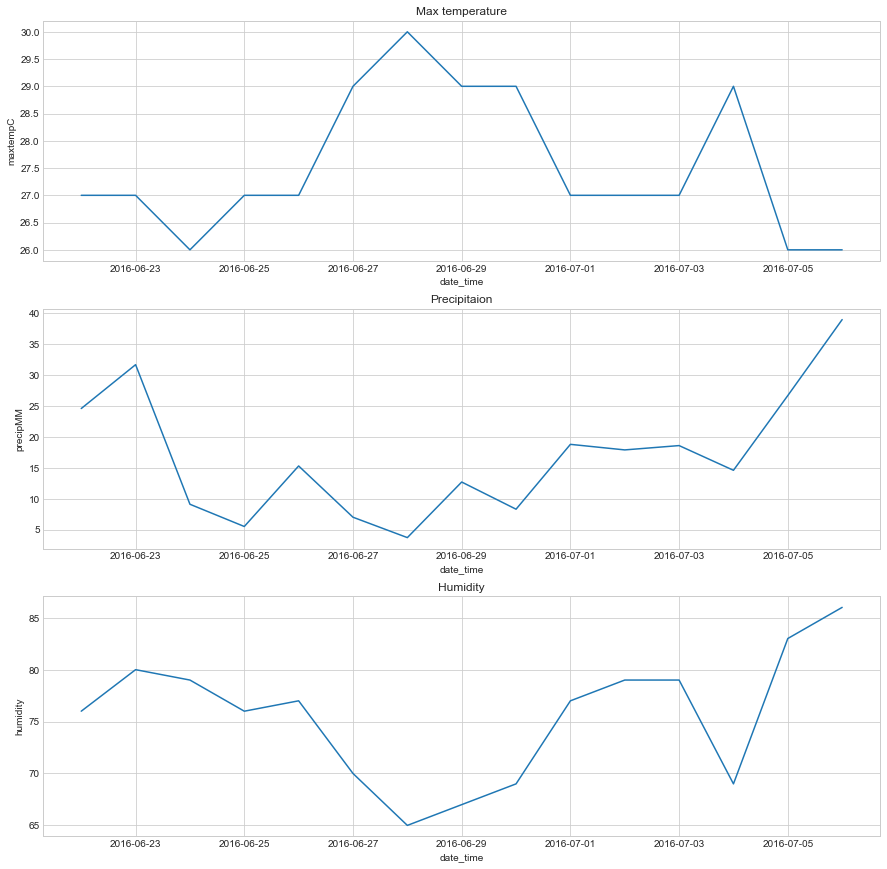

In [18]:
florida_case1 = floridaWeather.loc[(floridaWeather['date_time'] >= '2016-06-22') & (floridaWeather['date_time'] <= '2016-07-06')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=florida_case1)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=florida_case1)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=florida_case1)
axes[2].set_title('Humidity')

### Case 2
* Report date - 2016-07-27  = 0
* weather date - 2016-07-13  to 	22016-07-27 

Text(0.5, 1.0, 'Humidity')

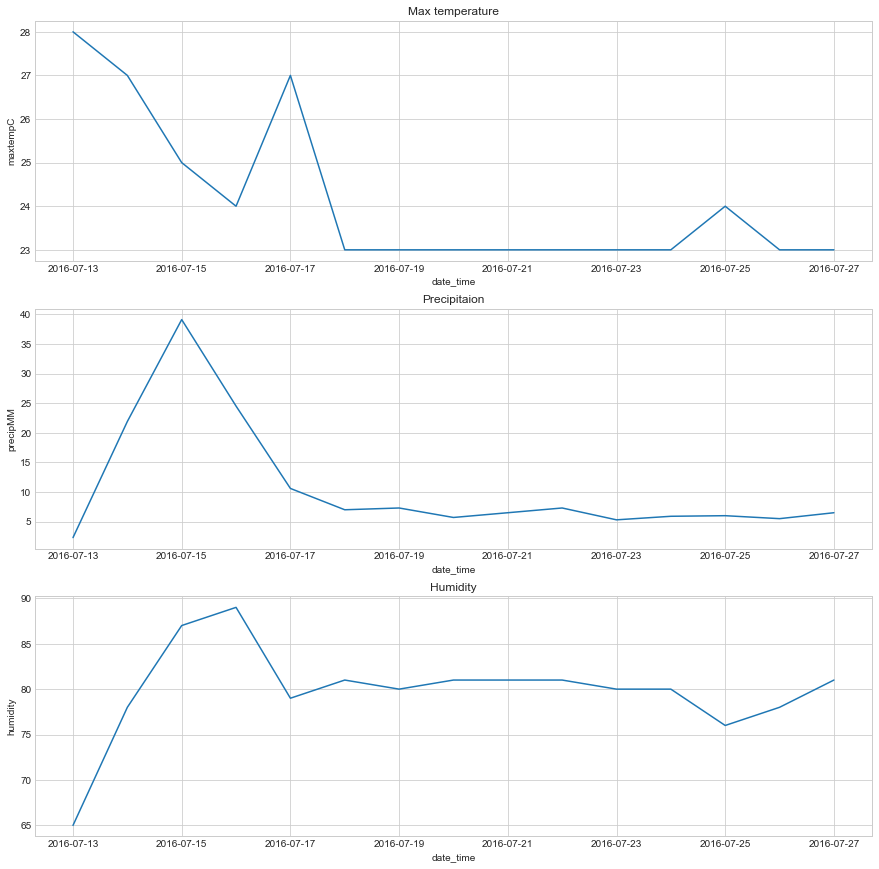

In [19]:
florida_case2 = floridaWeather.loc[(floridaWeather['date_time'] >= '2016-07-13') & (floridaWeather['date_time'] <= '2016-07-27')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=florida_case2)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=florida_case2)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=florida_case2)
axes[2].set_title('Humidity')

### Case 3
* Report date - 2016-08-03  = 6
* weather date - 2016-07-19  to 2016-08-03

Text(0.5, 1.0, 'Humidity')

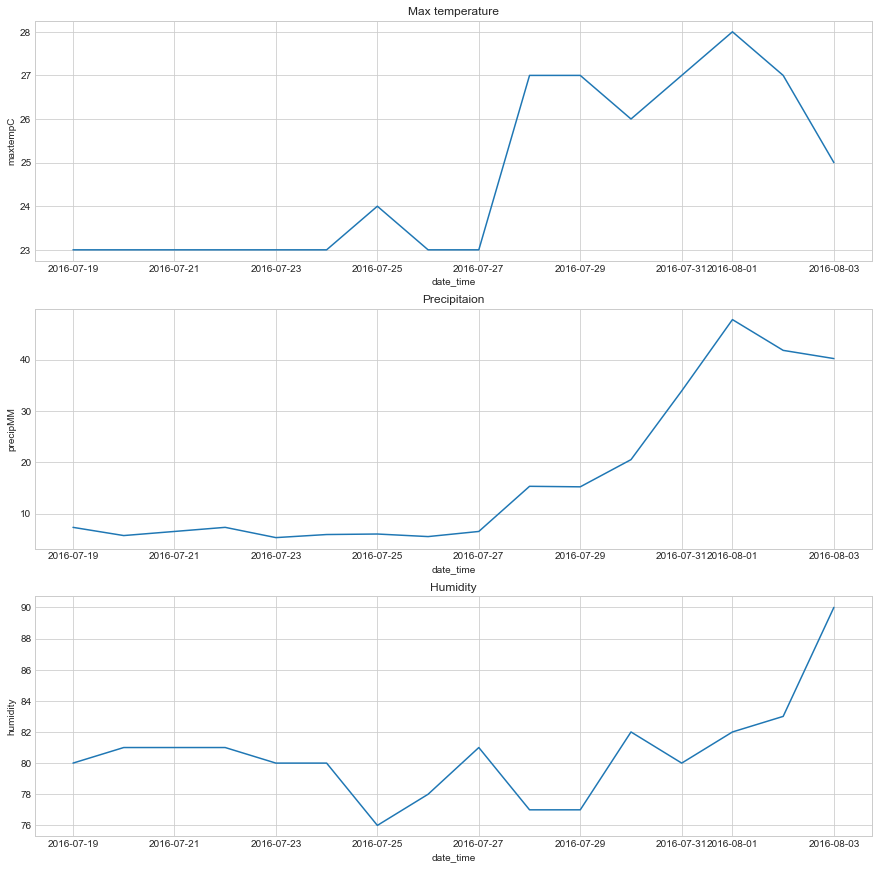

In [20]:
florida_case3 = floridaWeather.loc[(floridaWeather['date_time'] >= '2016-07-19') & (floridaWeather['date_time'] <= '2016-08-03')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=florida_case3)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=florida_case3)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=florida_case3)
axes[2].set_title('Humidity')

### Case 4
* Report date - 2016-08-17  = 14
* weather date - 2016-08-03 to 2016-08-17

Text(0.5, 1.0, 'Humidity')

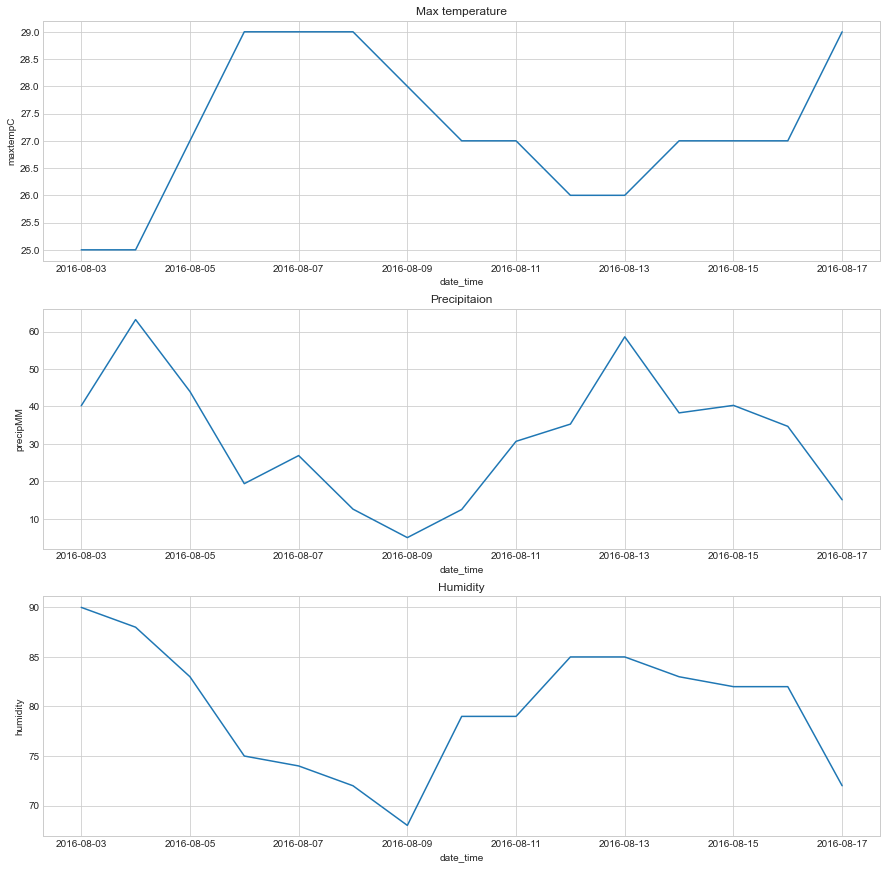

In [21]:
florida_case4 = floridaWeather.loc[(floridaWeather['date_time'] >= '2016-08-03') & (floridaWeather['date_time'] <= '2016-08-17')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=florida_case4)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=florida_case4)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=florida_case4)
axes[2].set_title('Humidity')

### Case 5
* Report date - 2016-11-08 = 139 
* weather date - 2016-10-24 to 2016-11-08

Text(0.5, 1.0, 'Humidity')

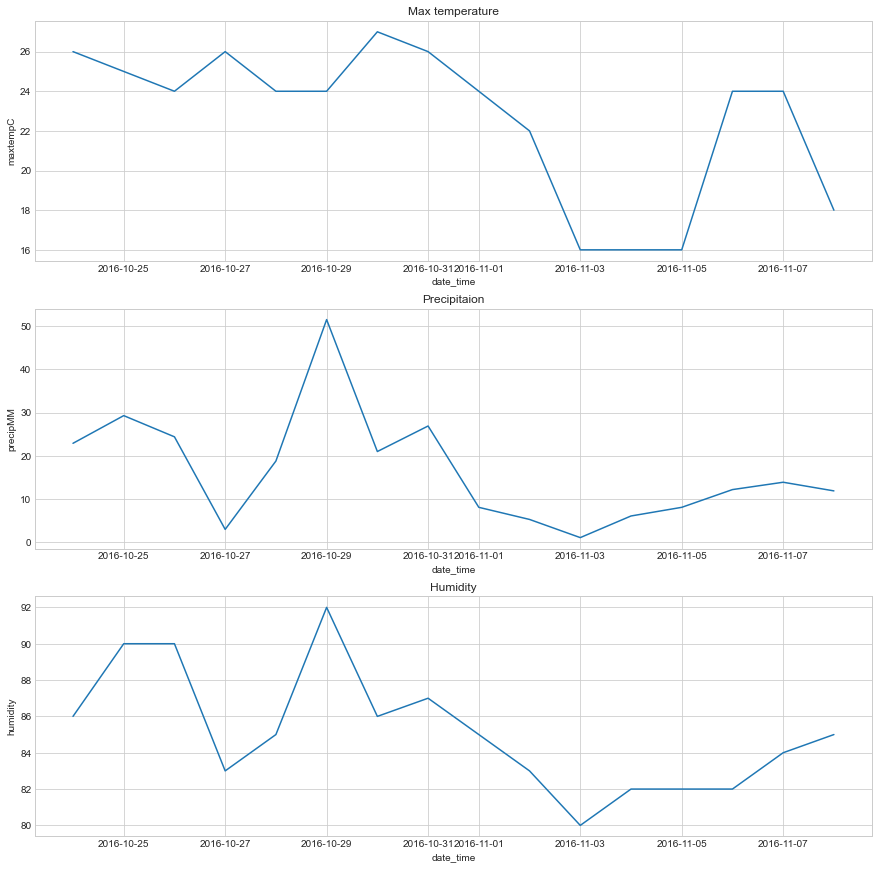

In [22]:
florida_case5 = floridaWeather.loc[(floridaWeather['date_time'] >= '2016-10-24') & (floridaWeather['date_time'] <= '2016-11-08')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=florida_case5)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=florida_case5)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=florida_case5)
axes[2].set_title('Humidity')

### Case 6
* Report date - 2017-02-13 = 214
* weather date - 2017-01-31 to 2017-02-13

Text(0.5, 1.0, 'Humidity')

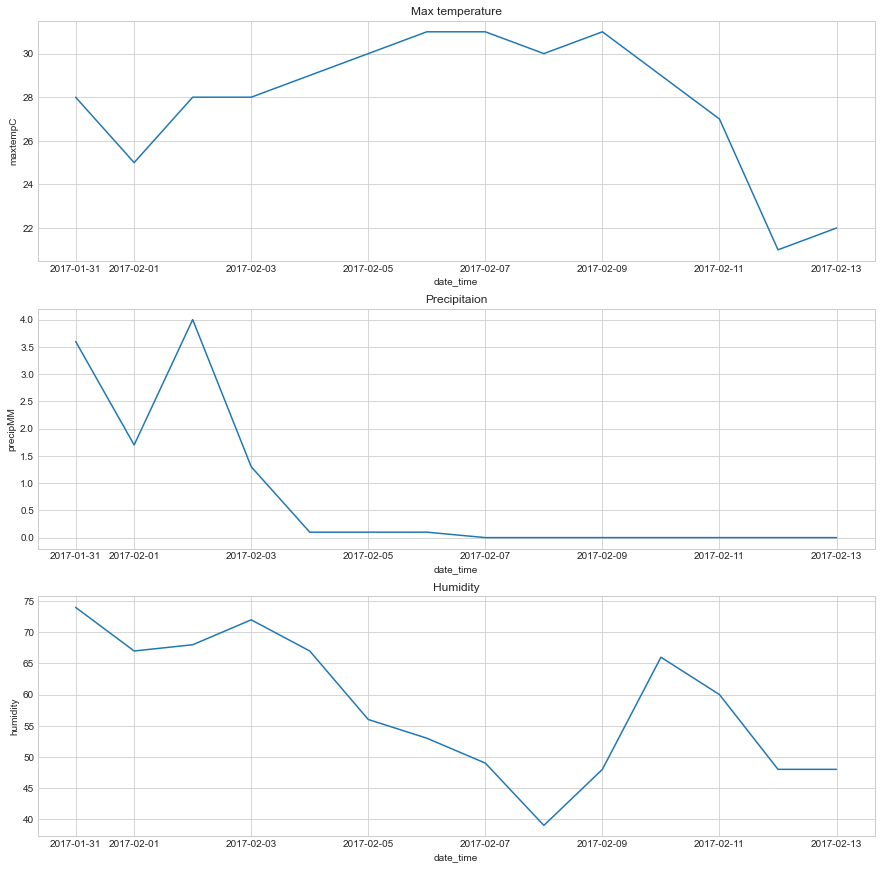

In [23]:
florida_case6 = floridaWeather.loc[(floridaWeather['date_time'] >= '2017-01-31') & (floridaWeather['date_time'] <= '2017-02-13')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=florida_case6)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=florida_case6)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=florida_case6)
axes[2].set_title('Humidity')

### Case 7
* Report date - 2017-03-02 = 24
* weather date - 2017-02-18 to 2017-03-02

Text(0.5, 1.0, 'Humidity')

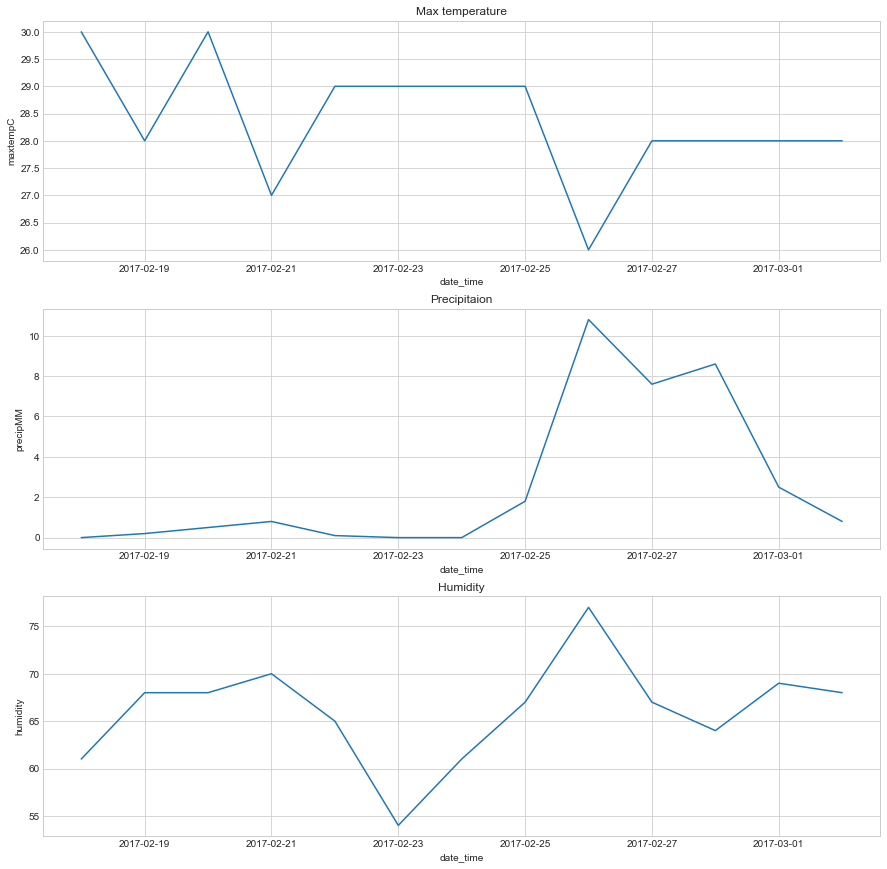

In [24]:
florida_case7 = floridaWeather.loc[(floridaWeather['date_time'] >= '2017-02-18') & (floridaWeather['date_time'] <= '2017-03-02')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=florida_case7)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=florida_case7)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=florida_case7)
axes[2].set_title('Humidity')

### Case 8
* Report date - 2017-05-24 = 24
* weather date - 2017-05-10 to 2017-05-24

Text(0.5, 1.0, 'Humidity')

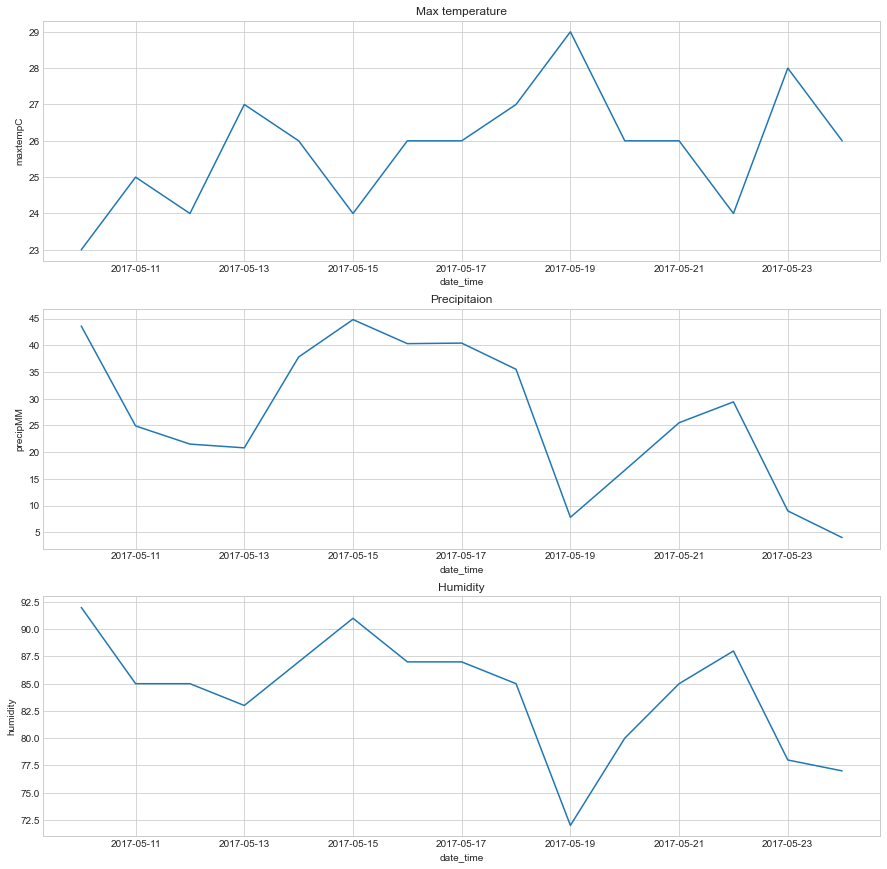

In [25]:
florida_case7 = floridaWeather.loc[(floridaWeather['date_time'] >= '2017-05-10') & (floridaWeather['date_time'] <= '2017-05-24')]
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=florida_case7)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=florida_case7)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=florida_case7)
axes[2].set_title('Humidity')

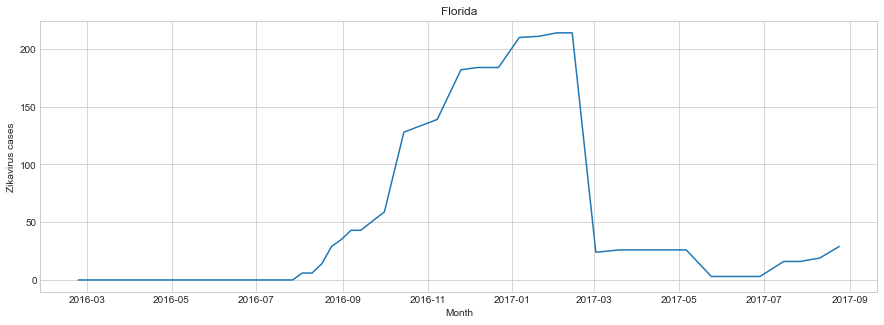

In [33]:
plt.figure(figsize=(15,5))
sns.lineplot(x='report_date', y='sum',data=florida)
plt.title('Florida')
plt.xlabel('Month')
plt.ylabel('Zikavirus cases')
plt.show()

Text(0.5, 1.0, 'Humidity')

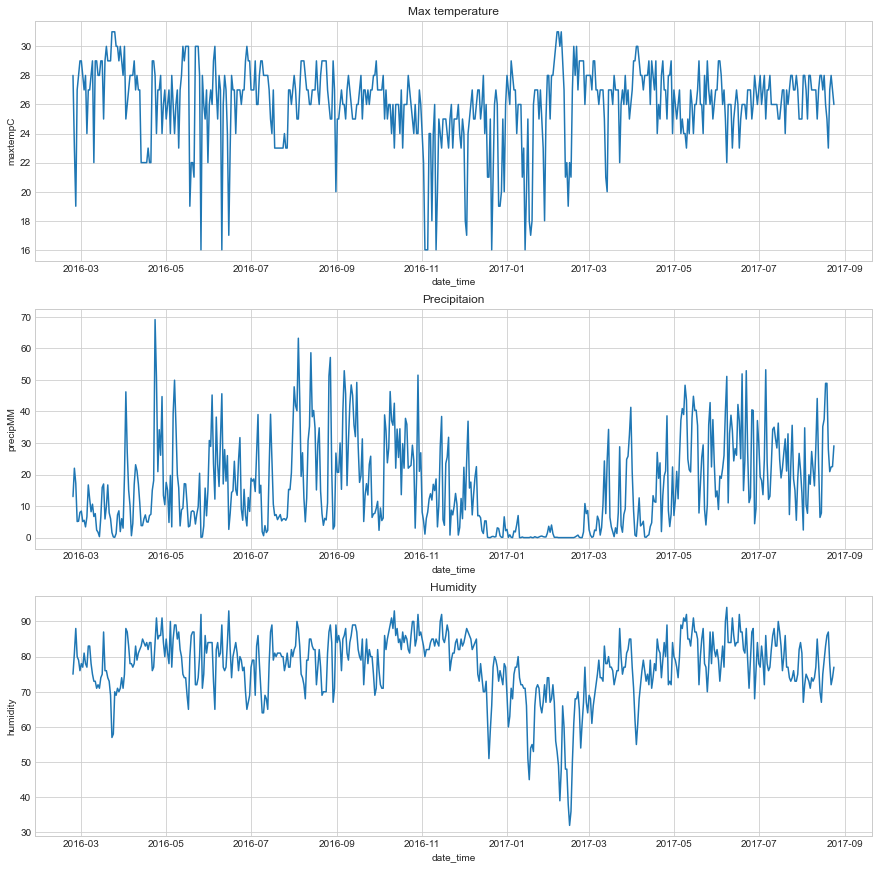

In [27]:
fig, axes = plt.subplots(3,1, figsize=(15, 15))
sns.lineplot(ax=axes[0],x='date_time',y='maxtempC',data=floridaWeather)
axes[0].set_title('Max temperature')
sns.lineplot(ax=axes[1],x='date_time',y='precipMM',data=floridaWeather)
axes[1].set_title('Precipitaion')
sns.lineplot(ax=axes[2],x='date_time',y='humidity',data=floridaWeather)
axes[2].set_title('Humidity')

In [28]:
florida_cases = florida.rename(columns={"report_date": "date_time"})
florida_weather = floridaWeather[['date_time','maxtempC','precipMM','humidity']]
weather_case = pd.merge(florida_cases,florida_weather, on=['date_time'], how='left') 
weather_case.head()

,date_time,sum,maxtempC,precipMM,humidity
0,2016-02-24,0,28,13.0,75
1,2016-03-02,0,28,5.1,77
2,2016-03-09,0,29,10.6,75
3,2016-03-16,0,29,15.9,75
4,2016-03-23,0,31,1.6,57


Text(0.5, 1.0, 'Humidity')

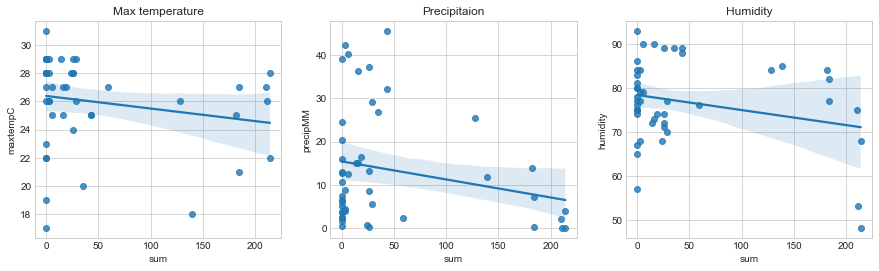

In [29]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
sns.regplot(ax=axes[0],y=weather_case['maxtempC'], x=weather_case['sum'])
axes[0].set_title('Max temperature')
sns.regplot(ax=axes[1],y=weather_case['precipMM'], x=weather_case['sum'])
axes[1].set_title('Precipitaion')
sns.regplot(ax=axes[2],y=weather_case['humidity'], x=weather_case['sum'])
axes[2].set_title('Humidity')

<AxesSubplot:>

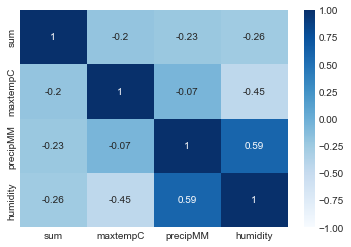

In [30]:
sns.heatmap(weather_case.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1) 